# Homework 4 (Due on Blackboard before class on Tue. 2/6)

**Name:** Jesse Weiss

You must use Jupyter notebook to complete homework 2 and submit it as a .ipynb file on Blackboard. This is to have you practice writing notebooks using markdown and code. For a tutorial on markdown, see: https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet. If you use code to solve for the final answer, please give your answer as part of a print statement that explains what the number means. Example: `print('Probability that X=5 is', prob)`. See these tutorials for how to nicely format output: https://www.digitalocean.com/community/tutorials/how-to-use-string-formatters-in-python-3 and https://www.programiz.com/python-programming/methods/string/format.

In [2]:
import math
import numpy as np
from scipy.stats import binom, uniform, norm
import pandas as pd
from collections import OrderedDict
import itertools
import matplotlib.pyplot as plt

## Question 1
(DMD Exercise 2.22) This question begins with the text "A large retail company has stores at two locations in a city..." To solve this question, you would have to use the formula in DMD Section 2.11.



Q: Compute the mean, variance and standard deviation of the total (combined) umbrella sales revenue form the 2 stores

In [3]:
mu_x, sd_x, price_x = 147.8, 51, 17
mu_y, sd_y, price_y = 63.2, 37, 9
corr_xy = .7

cov_xy = corr_xy * sd_x * sd_y

mean_revenue = mu_x * price_x + mu_y * price_y
var_revenue = price_x**2 * sd_x**2 + price_y**2 *sd_y**2 + 2*price_x*price_y*cov_xy
sd_revenue = math.sqrt(var_revenue)

print('Combined mean revenue is {0:.3f}'.format(mean_revenue))
print('Combined revenue variance is {0:.3f}'.format(var_revenue))
print('Combined revenue standard deviation is {0:.3f}'.format(sd_revenue))

Combined mean revenue is 3081.400
Combined revenue variance is 1266773.400
Combined revenue standard deviation is 1125.510


## Question 2
(DMD Exercise 2.25) This question begins with the text "Suppose a fraction 5% of the microchips produced by a leading microchip manufacturer are defective."

$P(Defective) = .05$<br/>
$P(Accept|Defective) = .1$<br/>
$P(Accept|Not Defective) =1$<br/>

In [13]:
prob_table = {'': ['accept','reject','p_defect'],
             'defective': [.05 * .1, .05 * .9, .05],
             'not_defective': [.95 , 0, .95],
             'p_inpect': [.05*.1 + .95, .05*.9, 1]}

pd.DataFrame(OrderedDict(prob_table)).set_index('')

,defective,not_defective,p_inpect
,,,
accept,0.005,0.95,0.955
reject,0.045,0.00,0.045
p_defect,0.050,0.95,1.000


In [4]:
q1 = .95**10
q2 = .955
q3 = .955**9 * .045
q4 = .95/.955
q5 = (.95/.955)**10

<ol>
<li>What is the prob that all 10 chips are not defective</l1>
<li>What is the prob that the inspector accepts a particular chip</li>
<li>What is the prob that the inspector accepts 9/10 chips</li>
<li>Given a chip is accepted, what is the prob it has no defect</li>
<li>Given all 10 are accepted, what is the prob that all have no defects</li>
</ol>

In [5]:
print('1. {0:.3f} \n2. {1:.3f} \n3. {2:.3f} \n4. {3:.3f} \n5. {4:.3f}'.format(q1,q2,q3,q4,q5))

1. 0.599 
2. 0.955 
3. 0.030 
4. 0.995 
5. 0.949


## Question 3
(DMD Exercise 2.27) This question begins with the text "In this exercise we examine the effects of overbooking in the airline industry."

$P(No Show) = .2$

In [34]:
dist = binom(n=11, p = .8)

q1 = dist.cdf(5)
q2 = dist.pmf(10)

# 12,000 for 10 passengers (out of 11) means they issue refunds??
q3_vals = []
for num_pas in range(12):
    prob = dist.pmf(num_pas)
    if num_pas != 11:
        q3_vals.append(prob * num_pas * 1200)
    else:
        q3_vals.append(prob * (10 * 1200 - 3000))
q3 = sum(q3_vals)

dist2 = binom(10,.8)

q4_vals = []
for num_pas in range(11):
    prob = dist2.pmf(num_pas)
    q4_vals.append(prob * num_pas * 1200)
q4 = sum(q4_vals)

print('1. {0:.3f} \n2. {1:.3f} \n3. {2:.3f} \n4. {3:.3f}'.format(q1,q2,q3,q4))

1. 0.012 
2. 0.236 
3. 10199.223 
4. 9600.000


<ol><li value = '5'> Yes it does. Depending on the probability that a given first class passenger is travelling with a companion (or companions), one catalyst for a cancellation or missed flight could ultimately affect multiple passengers.</li></ol>

## Question 4 
This question asks you to illustrate the Central Limit Theorem using Python plots.

a) (Coding DMD Example 3.11 in Section 3.7) Create python code that plots the 3 plots in Figure 3.14.

b) (Coding DMD Example 3.12 in Section 3.7) Create python code that plots the 4 plots in Figure 3.15.

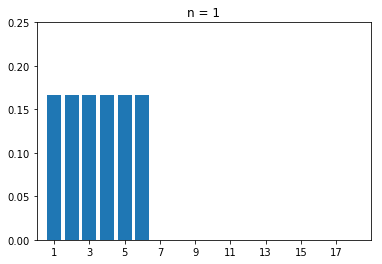

In [297]:
plt.bar(range(1,7),[1/6]*6)
plt.xlim(0,19)
plt.ylim(0,.25)
plt.title('n = 1')
plt.xticks(range(1,18,2))
plt.show()

In [287]:
def roll(n):
    die = range(1,7)
    if n == 2:
        roll = pd.DataFrame({'total' :[sum(x) for x in itertools.product(die,die)]})
    elif n == 3:
        roll = pd.DataFrame({'total' :[sum(x) for x in itertools.product(die,die,die)]})
    else:
        return('NA')

    roll = roll.groupby('total').agg({'total': 'count'})
    x = list(roll.index)
    y = [x/sum(list(roll['total'])) for x in list(roll['total'])]
    return(x,y)

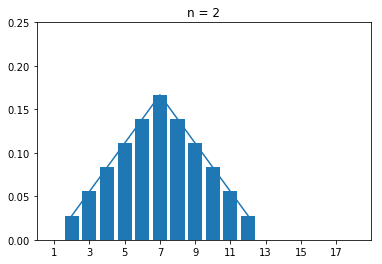

In [298]:
plt.bar(roll(2)[0],roll(2)[1])
plt.plot(roll(2)[0],roll(2)[1])
plt.xlim(0,19)
plt.ylim(0,.25)
plt.title('n = 2')
plt.xticks(range(1,18,2))
plt.show()

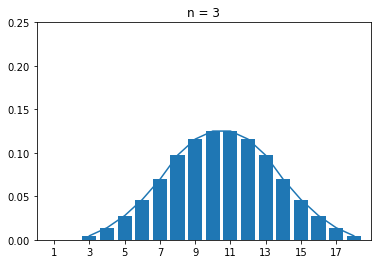

In [299]:
plt.bar(roll(3)[0],roll(3)[1])
plt.plot(roll(3)[0],roll(3)[1])
plt.xlim(0,19)
plt.ylim(0,.25)
plt.title('n = 3')
plt.xticks(range(1,18,2))
plt.show()

In [347]:
def fig315(n):
    dist = binom(n,.8)
    dist_x = []
    dist_y = []
    for x in range(0,n+1):
        dist_x.append(x)
        dist_y.append(dist.pmf(x))
        
    plt.bar(dist_x, dist_y)
    plt.plot(dist_x, dist_y)
    plt.xlim(0,25)
    plt.ylim(0,.35)
    plt.title('n = {0}'.format(n))
    plt.xticks(range(0,26,5))
    
    return(plt.show())

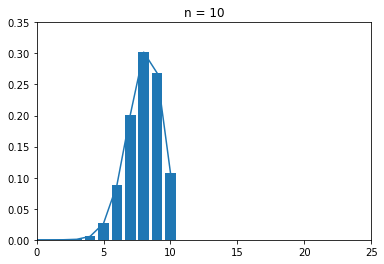

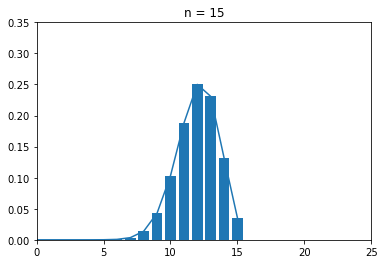

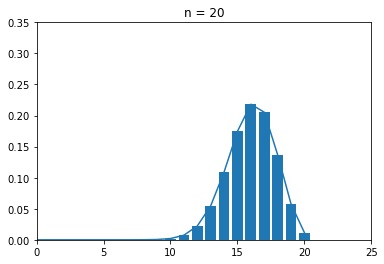

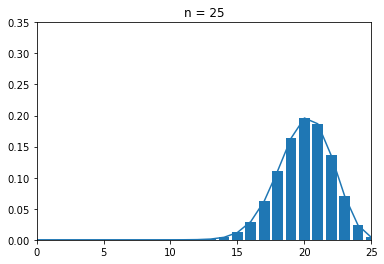

(None, None, None, None)

In [359]:
fig315(10), fig315(15),fig315(20), fig315(25)

## Question 5
(DMD Exercise 3.2) This question begins with the text "The men's 100 meter sprint at the 1996 Olympic Games..."

In [7]:
dist = uniform(9.75, 9.95 - 9.75)

In [10]:
q1 = dist.cdf(9.86)
q2 = 1-(1 - dist.cdf(9.86))**3
print('1. {0:.3f} prob that Donavan beats 9.86 secs \n2. {1:.3f} prob that the winning time beats 9.86 secs'.format(q1,q2))

1. 0.550 prob that Donavan beats 9.86 secs 
2. 0.909 prob that the winning time beats 9.86 secs


<ol><li value = '3'> Runners tend to rise to the competition so it's likely that a relatively fast or slow time from one runner could impact the performance of the other two.</li></ol>

## Question 6
(DMD Exercise 3.6) This question begins with the text "Winter lasts from December 21 through March 21..."

In [389]:
dist_bos = norm(32.5,1.59)
dist_ny = norm(35.4, 2.05)

q1 = 1 - dist_bos.cdf(32)
q2_dist = norm(32.5 - 35.4, math.sqrt(1.59**2 + 2.05**2))
q2 = 1 - q2_dist.cdf(0)

In [396]:
print('1. {0:.3f} prob that the avg winter temp in Boston is > 32 \n2. {1:.3f} prob that the avg winter temp in Boston is > than NY'.format(q1,q2))

1. 0.623 prob that the avg winter temp in Boston is > 32 
2. 0.132 prob that the avg winter temp in Boston is > than NY


<ol><li value = '3'>These two cities are very close to one another so the independence assumption is probably not all that reasonable. A very cold or very hot summer would affect both cities in similar ways.</li></ol>

## Question 7
(DMD Exercise 3.12) This question begins with the text "A portfolio manager believes that tomorrow's foreign exchange rate of German marks per U.S. dollar will be Normally distributed..."

In [405]:
dist = norm(2.03, .08)

q1 = 1 - dist.cdf(2.08)
q2 = dist.cdf(1.84)
q3 = dist.cdf(2.2) - dist.cdf(1.99)

print('1. {0:.3f} probability that rate will be above 2.08\n2. {1:.3f} probability that rate will be below 1.85\n3. {2:.3f} probability that rate will be between 2.00 and 2.20'.format(q1,q2,q3))

1. 0.266 probability that rate will be above 2.08
2. 0.009 probability that rate will be below 1.85
3. 0.675 probability that rate will be between 2.00 and 2.20


## Question 8
(DMD Exercise 3.18) This question begins with the text "In 1996, after an extensive investigation by the Consumer Product Safety Commission..."

1. The cars in the sample must be randomly selected and independant of one another to be modeled as a binomial random variable.

In [406]:
dist = binom(2000, .3)
q2 = dist.cdf(5)
print(q2)

6.06086539957e-298


<Ol><li value = '2'>Approximately 0 chance that 5 or fewer cars would have an electrical wiring problem</li>
<li>It is extremely unlikely that 30% of the cars have a problem with their electrical wiring.</li></ol>

## Question 9
Choose one continuous probability distribution and one discrete probability distribution in the `scipy.stats` library that we didn't discuss in class. See the scipy.stats documentation: https://docs.scipy.org/doc/scipy/reference/stats.html

For each of the two distributions, read the documentation above and Wikipedia the distribution. Then describe one example in your life or in your future career in which this distribution may be used to model an uncertainty. (If you can't find an example, choose another distribution.) Illustrate each application using reasonable parameters you choose, and plot the PMF or PDF of the distribution as well as a histogram of 100 samples. Write one sentence to summarize an insight from looking at the histogram or the PMF/PDF that may be helpful for the application you chose.

1. The beta distribution can be used to model a variety of different looking distributions between the fixed interval [0,1]. One potential application for the beta distribution could be modeling the expected percentage in salary increase I expect to recieve over a certain period of time (say 2 or 3 years).

In [407]:
from scipy.stats import beta

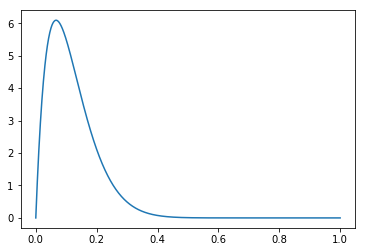

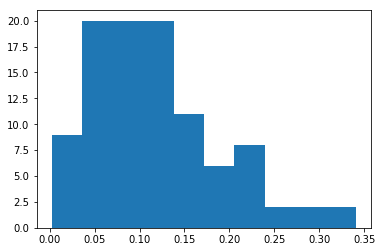

In [424]:
dist1 = beta(2,15)
x = np.linspace(0,1,1000)
y = []
for i in x:
    y.append(dist1.pdf(i))
plt.plot(x,y)
plt.show()
plt.hist(dist1.rvs(100))
plt.show()

It's likely that my salary will increase by some low, non-zero percentage over a 2 to 3 year period.

<ol><li value = '2'>The triangle distribution can be used to model a population for which there is limited data but the min, max, and most likely outcomes are known. I could use this distribution to run simulations for the number of customers who will complete their checkout in an online shopping scenario for a new website.

In [425]:
from scipy.stats import triang

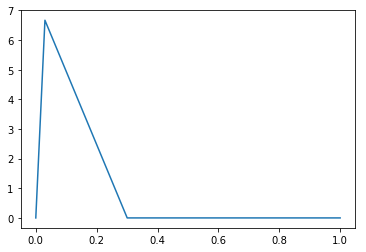

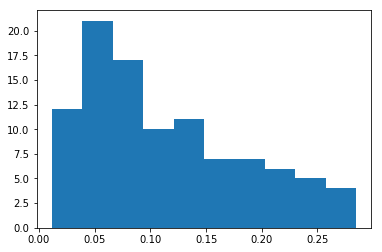

In [437]:
dist2 = triang(.1, 0, .3)
x = np.linspace(0,1,1000)
y = []
for i in x:
    y.append(dist2.pdf(i))
plt.plot(x,y)
plt.show()
plt.hist(dist2.rvs(100))
plt.show()

In this example I know that about 10% of customers tend to complete their transactions with a gradual decline in liklihood until a maximum of 30%